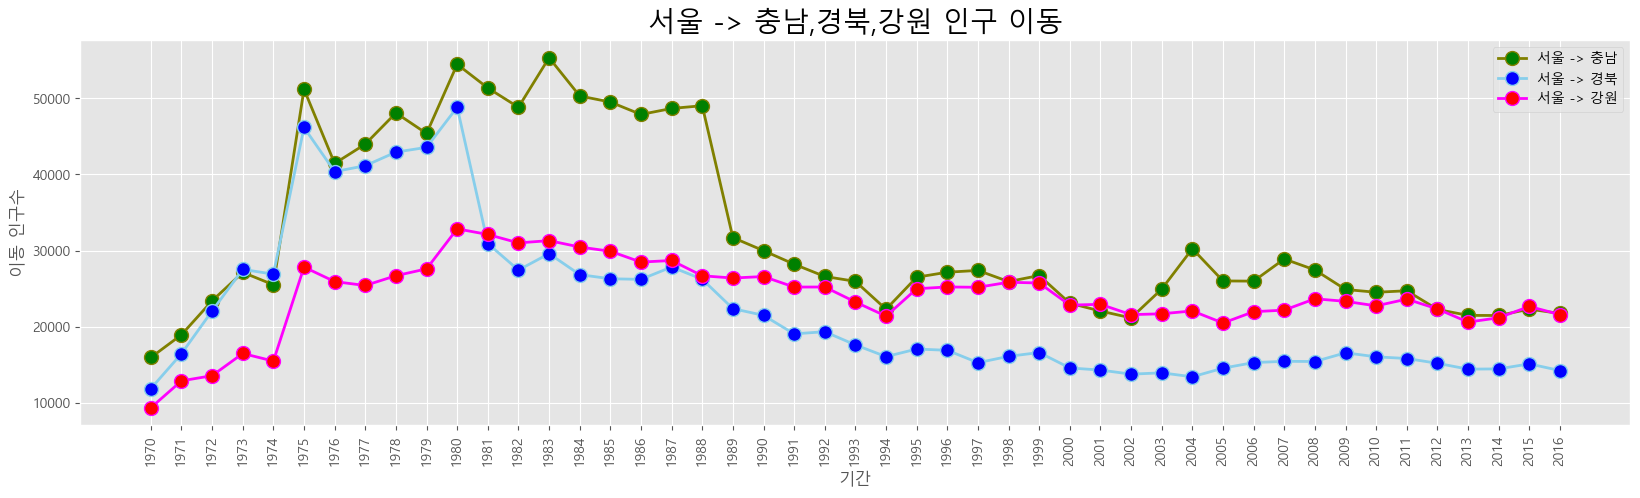

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_path="./data/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask=(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')
df_seoul=df[mask]
df_seoul=df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul

sr_one=df_seoul.loc['경기도']

col_years=list(map(str,range(1970,2017)))
df_3=df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(col_years,df_3.loc['충청남도',:],
        marker='o',markerfacecolor='green',
        markersize=10,color='olive',linewidth=2,label='서울 -> 충남')
ax.plot(col_years,df_3.loc['경상북도',:],
        marker='o',markerfacecolor='blue',
        markersize=10,color='skyblue',linewidth=2,label='서울 -> 경북')
ax.plot(col_years,df_3.loc['강원도',:],
        marker='o',markerfacecolor='red',
        markersize=10,color='magenta',linewidth=2,label='서울 -> 강원')
ax.legend(loc='best')


ax.set_title('서울 -> 충남,경북,강원 인구 이동',size=20)
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticks(range(len(col_years)))

ax.set_xticklabels(col_years,rotation=90)

ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show()